## 多通道卷积

In [38]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image
import numpy as np
import torchvision.transforms as transforms
from einops import rearrange

## 模型

In [39]:
class ConvSim(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, padding):
        super(ConvSim, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding, bias=False)
        self.layernorm = nn.LayerNorm([in_channels, kernel_size, kernel_size])


    def forward(self, x):
        self.conv.weight.data = self.layernorm(rearrange(x, 'c (h1 h) (w1 w) -> (h1 w1) c h w', h1=32, w1=32))
        x = self.conv(x)

        return x
    
model = ConvSim(3, 32 * 32, 15, 1, 7)
input = torch.randn(3, 480, 480) # NCHW
output = model(input)
print(output.shape)

torch.Size([1024, 480, 480])


### 简单验证一下

In [26]:
model.conv.weight.data.shape

torch.Size([1024, 3, 15, 15])

In [27]:
sails_RGB = Image.open("images/sails_480.png")

In [28]:
sails_RGB_np = np.array(sails_RGB)
sails_RGB_np.shape

(480, 480, 3)

In [31]:
sails_patches = rearrange(sails_RGB_np, '(h1 h) (w1 w) c-> (h1 w1) h w c', h1=32, w1=32)

In [35]:
tmp = Image.fromarray(sails_patches[500])
tmp

In [37]:
rearrange(sails_RGB_np, '(h1 h) (w1 w) c-> (h1 w1) c h w', h1=32, w1=32).shape

(1024, 3, 15, 15)

## 开始测试

In [40]:
sails_RGB = Image.open("images/sails_480.png")

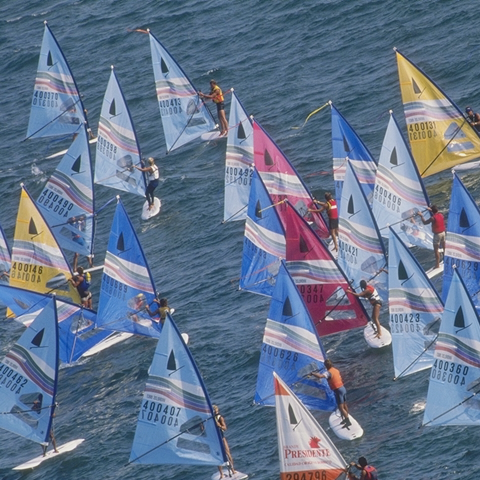

In [41]:
sails_RGB

In [42]:
transform = transforms.Compose([
    transforms.ToTensor()
])

In [43]:
sails_RGB_tensor = transform(sails_RGB)

In [45]:
sails_RGB_tensor.shape

torch.Size([3, 480, 480])

In [46]:
model = ConvSim(
    in_channels=3, 
    out_channels=32 * 32, 
    kernel_size=15, 
    stride=1, 
    padding=7
)

In [47]:
with torch.no_grad():
    output = model(sails_RGB_tensor)
    print(output.shape)

torch.Size([1024, 480, 480])


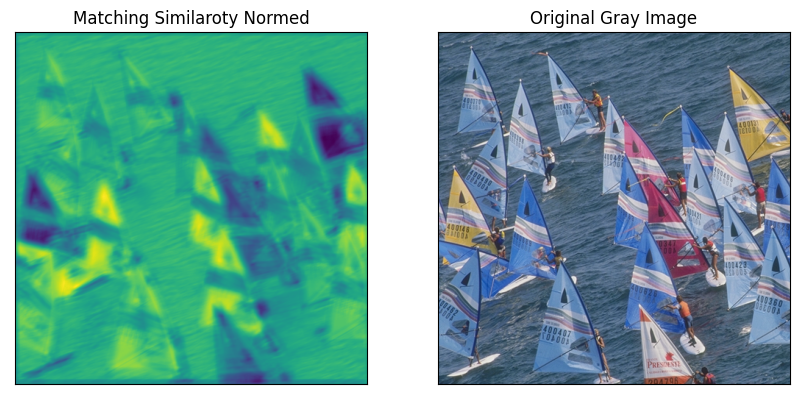

In [78]:
R_CCORR_NORM = output[1].numpy().squeeze()
sails_RGB_np = sails_RGB_tensor.numpy().squeeze()
# 3, 480, 480 -> 480, 480, 3
sails_RGB_np = np.transpose(sails_RGB_np, (1, 2, 0))
import matplotlib.pyplot as plt
plt.figure("Matching Similaroty vs Original Gray Image", figsize=(10, 5))
plt.subplot(121),plt.imshow(R_CCORR_NORM)
plt.title('Matching Similaroty Normed'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(sails_RGB_np)
plt.title('Original Gray Image'), plt.xticks([]), plt.yticks([])
plt.show()

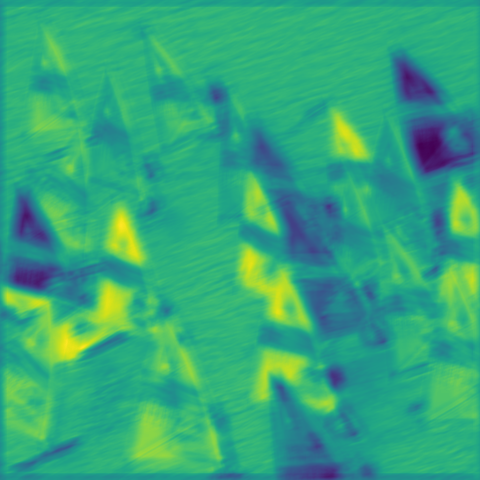

In [87]:
R_CCORR_NORM_NORM = (R_CCORR_NORM - R_CCORR_NORM.min()) / (R_CCORR_NORM.max() - R_CCORR_NORM.min())
cmap = plt.get_cmap('viridis')
rgb_image = cmap(R_CCORR_NORM_NORM) * 255
rgb_image = rgb_image[:, :, :3]
rgb_image = rgb_image.astype(np.uint8)
sails_sim = Image.fromarray(rgb_image, mode='RGB')
sails_sim


In [88]:
sails_sim.save("images/sails_sim.jpg")

In [90]:
for i in range(32):
    for j in range(32):
        idx = i * 32 + j
        R_CCORR_NORM = output[idx].numpy().squeeze()
        R_CCORR_NORM_NORM = (R_CCORR_NORM - R_CCORR_NORM.min()) / (R_CCORR_NORM.max() - R_CCORR_NORM.min())
        cmap = plt.get_cmap('hot')
        rgb_image = cmap(R_CCORR_NORM_NORM) * 255
        rgb_image = rgb_image[:, :, :3]
        rgb_image = rgb_image.astype(np.uint8)
        sails_sim = Image.fromarray(rgb_image, mode='RGB')
        sails_sim.save(f"sim/image_{i}_{j}.jpg")

In [92]:
for i in range(32):
    for j in range(32):
        print(f"<div class=\"image\" id=\"image_{i}_{j}\"></div>")

<div class="image" id="image_0_0"></div>
<div class="image" id="image_0_1"></div>
<div class="image" id="image_0_2"></div>
<div class="image" id="image_0_3"></div>
<div class="image" id="image_0_4"></div>
<div class="image" id="image_0_5"></div>
<div class="image" id="image_0_6"></div>
<div class="image" id="image_0_7"></div>
<div class="image" id="image_0_8"></div>
<div class="image" id="image_0_9"></div>
<div class="image" id="image_0_10"></div>
<div class="image" id="image_0_11"></div>
<div class="image" id="image_0_12"></div>
<div class="image" id="image_0_13"></div>
<div class="image" id="image_0_14"></div>
<div class="image" id="image_0_15"></div>
<div class="image" id="image_0_16"></div>
<div class="image" id="image_0_17"></div>
<div class="image" id="image_0_18"></div>
<div class="image" id="image_0_19"></div>
<div class="image" id="image_0_20"></div>
<div class="image" id="image_0_21"></div>
<div class="image" id="image_0_22"></div>
<div class="image" id="image_0_23"></div>
<d